## We have divided the problem into two parts
(a) Predict the floor number
(b) Predict the way points or location on that floor

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
from pathlib import Path
pd.options.mode.chained_assignment = None  # default='warn'
from dataclasses import dataclass
from sklearn import preprocessing

In [2]:
import keras
from keras.utils import to_categorical
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Data Exploration
We will first check the lengths of the files by comparing the number of rows in each file.

In [4]:
#Function to check file length
def file_len(file_name):
    with open(file_name) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [6]:
#We will compare files for one floor B1 in the building
file_path = '/content/drive/MyDrive/building1/data/B1'
pathlist = Path(file_path).rglob('*.txt')
max_file_rows=0
min_file_rows=100000
for path in pathlist:
  path_in_str = str(path)
  file_rows=file_len(path_in_str)
  if(file_rows>max_file_rows):
    max_file_rows=file_rows
  if(file_rows<min_file_rows):
    min_file_rows=file_rows  
print(max_file_rows)
print(min_file_rows)


49085
3161


####So, there is huge difference between file sizes. Let's find out the number of unique timestamps in each trace file and compare maximum and minimum. 

In [7]:
#Function to find out the number of timesolts in a file   

def time_slot_len(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        ts_series=[]
    for line_data in lines:
        line_data = line_data.strip()
        if not line_data or line_data[0] == '#':
          continue
        else:
          line_data = line_data.split('\t')
          ts_series.append(int(line_data[0]))  
    ts_series=np.array(ts_series)
    length=len(np.unique(ts_series)) #get unique number of timestamps        
    return length  

In [8]:
#We will go through all the folders and read each file to count the number of timestamps
#Then for each floor we find out the maximum and minimum number of timeslots for all the trace files 
file_path = '/content/drive/MyDrive/building1/data/B1'
pathlist = Path(file_path).rglob('*.txt')
max_ts_count=0
min_ts_count=100000
sum_ts=0
for path in pathlist:
  path_in_str = str(path)
  ts_length=time_slot_len(path_in_str)
  sum_ts=sum_ts+ts_length
  if(ts_length>max_ts_count):
    max_ts_count=ts_length
  if(ts_length<min_ts_count):
    min_ts_count=ts_length  
print("Maximum count of timeslots for B1:",max_ts_count)
print("Minimum count of timeslots for B1:",min_ts_count)
print("Sum of count of timeslots for B1:",sum_ts)
#Repeating for all floors
file_path = '/content/drive/MyDrive/building1/data/F1'
pathlist = Path(file_path).rglob('*.txt')
max_ts_count=0
min_ts_count=100000
sum_ts=0
for path in pathlist:
  path_in_str = str(path)
  ts_length=time_slot_len(path_in_str)
  sum_ts=sum_ts+ts_length
  if(ts_length>max_ts_count):
    max_ts_count=ts_length
  if(ts_length<min_ts_count):
    min_ts_count=ts_length  
print("Maximum count of timeslots for F1:",max_ts_count)
print("Minimum count of timeslots for F1:",min_ts_count)
print("Sum of count of timeslots for F1:",sum_ts)
################
file_path = '/content/drive/MyDrive/building1/data/F2'
pathlist = Path(file_path).rglob('*.txt')
max_ts_count=0
min_ts_count=100000
sum_ts=0
for path in pathlist:
  path_in_str = str(path)
  ts_length=time_slot_len(path_in_str)
  sum_ts=sum_ts+ts_length
  if(ts_length>max_ts_count):
    max_ts_count=ts_length
  if(ts_length<min_ts_count):
    min_ts_count=ts_length  
print("Maximum count of timeslots for F2:",max_ts_count)
print("Minimum count of timeslots for F2:",min_ts_count)
print("Sum of count of timeslots for F2:",sum_ts)
######################
file_path = '/content/drive/MyDrive/building1/data/F3'
pathlist = Path(file_path).rglob('*.txt')
max_ts_count=0
min_ts_count=100000
sum_ts=0
for path in pathlist:
  path_in_str = str(path)
  ts_length=time_slot_len(path_in_str)
  sum_ts=sum_ts+ts_length
  if(ts_length>max_ts_count):
    max_ts_count=ts_length
  if(ts_length<min_ts_count):
    min_ts_count=ts_length  
print("Maximum count of timeslots for F3:",max_ts_count)
print("Minimum count of timeslots for F3:",min_ts_count)
print("Sum of count of timeslots for F3:",sum_ts)
####################
file_path = '/content/drive/MyDrive/building1/data/F4'
pathlist = Path(file_path).rglob('*.txt')
max_ts_count=0
min_ts_count=100000
sum_ts=0
for path in pathlist:
  path_in_str = str(path)
  ts_length=time_slot_len(path_in_str)
  sum_ts=sum_ts+ts_length
  if(ts_length>max_ts_count):
    max_ts_count=ts_length
  if(ts_length<min_ts_count):
    min_ts_count=ts_length  
print("Maximum count of timeslots for F4:",max_ts_count)
print("Minimum count of timeslots for F4:",min_ts_count)
print("Sum of count of timeslots for F4:",sum_ts)

Maximum count of timeslots for B1: 6255
Minimum count of timeslots for B1: 391
Sum of count of timeslots for B1: 226895
Maximum count of timeslots for F1: 5799
Minimum count of timeslots for F1: 257
Sum of count of timeslots for F1: 215327
Maximum count of timeslots for F2: 21306
Minimum count of timeslots for F2: 320
Sum of count of timeslots for F2: 290344
Maximum count of timeslots for F3: 10804
Minimum count of timeslots for F3: 285
Sum of count of timeslots for F3: 147322
Maximum count of timeslots for F4: 28877
Minimum count of timeslots for F4: 240
Sum of count of timeslots for F4: 261828


##### For each timetamp we will separate the sensor data such that we get a time series with sensor data. We need all the trace sequences to have same number of unique time stamps for our models. The length of the time series must be same.  But the difference between these file traces is too big to be filled with dummy values. So, we will restrict ourselves to 200 timestamp values for time series in each trace. If we select sensor data for only the first 200 unique timestamps then this will lead to massive loss of data. So, we will split each trace into multiple time series data with each having 200 unique timestamps.

2. Data preprocessing

In [ ]:
#Function to connect waypoint coordinates with straight lines
#This will be used for second part of project.We will discuss about this later.
def connect_waypoints(wp_df):
  if(wp_df.at[0,'waypoint_val1']==''):
    wp_df.at[0,'waypoint_val1']=0
  if(wp_df.at[0,'waypoint_val2']==''):
    wp_df.at[0,'waypoint_val2']=0  
  j=0
  i=0
  last=0
  #print(wp_df.head(5))
  while i < (len(wp_df)-1):
    j=i+1
    while((wp_df.at[j,'waypoint_val1']==0) and (wp_df.at[j,'waypoint_val2']==0) ):
      if(j==len(wp_df)-1):
        wp_df.at[j,'waypoint_val1']=wp_df.at[i,'waypoint_val1']
        wp_df.at[j,'waypoint_val2']=wp_df.at[i,'waypoint_val2']
        last=1
        break
      j+=1
    temp_arrayx=np.linspace(wp_df.at[i,'waypoint_val1'],wp_df.at[j,'waypoint_val1'], num=j-i+1)
    temp_arrayy=np.linspace(wp_df.at[i,'waypoint_val2'],wp_df.at[j,'waypoint_val2'], num=j-i+1)
    #print(temp_arrayx)
    m=0
    for k in range(i,j+1):
      wp_df.at[k,'waypoint_val1']=temp_arrayx[m]
      wp_df.at[k,'waypoint_val2']=temp_arrayy[m]
      #For final comparison of our predicted location, we will need to mark which waypoints were in original data before connecting them
      #print('k=',k,'i=',i,'j=',j)
      if((k==i) and (last==0)):
        wp_df.at[k,'interpolated']=1 #original waypoints
      else:
        wp_df.at[k,'interpolated']=0  #interpolated waypoints
      m+=1
    i=j
  return wp_df     


In [ ]:
# Function to extract arrays for each sensor with timeslots.
# This particular function is modified from the function provided by the competition's github page at https://github.com/location-competition/indoor-location-competition-20/blob/master/io_f.py

@dataclass
class ReadData:
    acce: np.ndarray
    acce_uncali: np.ndarray
    gyro: np.ndarray
    gyro_uncali: np.ndarray
    magn: np.ndarray
    magn_uncali: np.ndarray
    ahrs: np.ndarray
    wifi: np.ndarray
    ibeacon: np.ndarray
    waypoint: np.ndarray


def read_data_file(data_filename):
    acce = []
    acce_uncali = []
    gyro = []
    gyro_uncali = []
    magn = []
    magn_uncali = []
    ahrs = []
    wifi = []
    ibeacon = []
    waypoint = []
    line_count=0
    with open(data_filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for line_data in lines:
        #line_count=line_count+1
        #if(line_count>3000):
        #  break
        line_data = line_data.strip()
        if not line_data or line_data[0] == '#':
            continue

        line_data = line_data.split('\t')

        if line_data[1] == 'TYPE_ACCELEROMETER':
            acce.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_ACCELEROMETER_UNCALIBRATED':
            acce_uncali.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_GYROSCOPE':
            gyro.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_GYROSCOPE_UNCALIBRATED':
            gyro_uncali.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_MAGNETIC_FIELD':
            magn.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_MAGNETIC_FIELD_UNCALIBRATED':
            magn_uncali.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_ROTATION_VECTOR':
            ahrs.append([int(line_data[0]), float(line_data[2]), float(line_data[3]), float(line_data[4])])
            continue

        if line_data[1] == 'TYPE_WIFI':
            sys_ts = int(line_data[0])
            ssid = line_data[2]
            bssid = line_data[3]
            rssi = line_data[4]
            lastseen_ts = line_data[6]
            wifi_data = [sys_ts, ssid, bssid, rssi, lastseen_ts]
            wifi.append(wifi_data)
            continue

        if line_data[1] == 'TYPE_BEACON':
            ts = int(line_data[0])
            uuid = line_data[2]
            major = line_data[3]
            minor = line_data[4]
            rssi = line_data[6]
            ibeacon_data = [ts, '_'.join([uuid, major, minor]), rssi]
            ibeacon.append(ibeacon_data)
            continue

        if line_data[1] == 'TYPE_WAYPOINT':
            waypoint.append([int(line_data[0]), float(line_data[2]), float(line_data[3])])

    acce = np.array(acce,dtype=np.float)
    acce_uncali = np.array(acce_uncali,dtype=np.float)
    gyro = np.array(gyro,dtype=np.float)
    gyro_uncali = np.array(gyro_uncali,dtype=np.float)
    magn = np.array(magn,dtype=np.float)
    magn_uncali = np.array(magn_uncali,dtype=np.float)
    ahrs = np.array(ahrs)
    wifi = np.array(wifi)
    ibeacon = np.array(ibeacon)
    waypoint = np.array(waypoint)

    return ReadData(acce, acce_uncali, gyro, gyro_uncali, magn, magn_uncali, ahrs, wifi, ibeacon, waypoint)

In [ ]:
#Function to go through all the files in the folder and return the sensor data 
# in the form of arrays
@dataclass
class trace:
    sequence: np.ndarray
    target_seq: np.ndarray
    waypoint_seq: np.ndarray
    wp_full_seq: np.ndarray

def convert_to_df(file_path,floor,timeslots):
    pathlist = Path(file_path).rglob('*.txt')
    sequence = list()
    target_seq=list()
    waypoint_seq=list()
    wp_full_seq=list()
    path_id=1
    floor_trace_df=pd.DataFrame()
    for path in pathlist:
         # because path is object not string
        path_in_str = str(path)
         # print(path_in_str)
        trace_file = read_data_file(path_in_str)
        trace_df=pd.DataFrame()
        if(trace_file.acce.size):
            acce_df=pd.DataFrame(trace_file.acce, columns=['Timestamp','acce_val1','acce_val2','acce_val3'])
        if(trace_file.acce_uncali.size):
            acce__uncal_df=pd.DataFrame(trace_file.acce_uncali, columns=['Timestamp','acce_uncal_val1','acce_uncal_val2','acce_uncal_val3'])   
        if(trace_file.gyro.size):
            gyro_df=pd.DataFrame(trace_file.gyro, columns=['Timestamp','gyro_val1','gyro_val2','gyro_val3'])
        if(trace_file.gyro_uncali.size):
            gyro_uncal_df=pd.DataFrame(trace_file.gyro_uncali, columns=['Timestamp','gyro_uncal_val1','gyro_uncal_val2','gyro_uncal_val3'])
        if(trace_file.magn.size):
            magn_df=pd.DataFrame(trace_file.magn, columns=['Timestamp','magn_val1','magn_val2','magn_val3'])
        if(trace_file.magn_uncali.size):
            magn_uncal_df=pd.DataFrame(trace_file.magn_uncali, columns=['Timestamp','magn_uncal_val1','magn_uncal_val2','magn_uncal_val3'])
        if(trace_file.ahrs.size):
            rot_df=pd.DataFrame(trace_file.ahrs, columns=['Timestamp','rot_val1','rot_val2','rot_val3'])           
        if(trace_file.wifi.size):
            wifi_df=pd.DataFrame(trace_file.wifi, columns=['Timestamp','wifi_val1','wifi_val2','wifi_val3','wifi_val4']) 
        if(trace_file.ibeacon.size):
            ibeacon_df=pd.DataFrame(trace_file.ibeacon, columns=['Timestamp','ibeacon_val1','ibeacon_val2'])    
        if(trace_file.waypoint.size):
            waypoint_df=pd.DataFrame(trace_file.waypoint, columns=['Timestamp','waypoint_val1','waypoint_val2'])
        
        #change data type of wifi dataframe timestamp and ibeacon timestamp
        wifi_df["Timestamp"] = wifi_df.Timestamp.astype(float)
        ibeacon_df["Timestamp"] = ibeacon_df.Timestamp.astype(float)
        trace_df = pd.merge(acce_df, acce__uncal_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, gyro_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, gyro_uncal_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, magn_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, magn_uncal_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, rot_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, wifi_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, ibeacon_df, on='Timestamp', how='outer')
        trace_df = pd.merge(trace_df, waypoint_df, on='Timestamp', how='outer')
        ###### Cast time stamp to integer
        trace_df["Timestamp"] = trace_df.Timestamp.astype(int)

        # sorting by Timestamp and deleting duplicate timeslots 
        
        trace_df.sort_values("Timestamp", inplace = True)
        trace_df = trace_df.reset_index(drop=True)
        trace_df.drop_duplicates(subset="Timestamp",keep=False, inplace=True)
        trace_df = trace_df.reset_index(drop=True)
        
        trace_df=trace_df.replace(np.nan,0)

        #keep only top 200 rows in one sequence     
        #trace_df=trace_df.head(200)

        #for i in range(0,len(trace_df)):
         # trace_df.at[i,'Timestamp']=i
        
        #trace_df['time_index'] = trace_df.index
        #print(trace_df.head())
        #trace_df['floor_name']=floor
        #trace_df['path_id']=floor+path_id
        #path_id=path_id+1
        #trace_df['wifi_df'].fillna(0)
        #trace_df['ibeacon_df'].fillna(0)
        #trace_df['wifi_df'].fillna(0)
        

        wp_df = trace_df[['waypoint_val1', 'waypoint_val2']].copy()
        wp_df=connect_waypoints(wp_df)
        wp_values=wp_df.values
        #Removing text based fields in dataframe
        trace_df=trace_df.drop(['Timestamp'], axis=1)
        trace_df=trace_df.drop(['wifi_val1'], axis=1)
        trace_df=trace_df.drop(['wifi_val2'], axis=1)
        trace_df=trace_df.drop(['ibeacon_val1'], axis=1)
        trace_df.astype('float32')        
        trace_df=trace_df.drop(['waypoint_val1','waypoint_val2'], axis=1)
        #floor_trace_df=floor_trace_df.append(trace_df)
        values = trace_df.values 


        


        #Now split sequence into required number of timeslots
        l=int(len(values)/timeslots)
        k=0
        for m in range(l):
          s_temp=values[k:k+timeslots]
          wp_temp=wp_values[k:k+timeslots]
          #Normalize
          #min_max_scaler = preprocessing.MinMaxScaler()
          #s_scaled = min_max_scaler.fit_transform(s_temp)
          sequence.append(s_temp)
          wp_full_seq.append(wp_temp)
          target_seq.append(floor)
          wp_temp=wp_df.iloc[k:k+timeslots,0:]
          wp_temp=wp_temp.reset_index(drop=True)
          #wp_temp=connect_waypoints(wp_temp)
        #Now after connecting the waypoints, the avearge has become a wieghted average in time series
          wp_avg_x=wp_temp['waypoint_val1'].mean()
          wp_avg_y=wp_temp['waypoint_val2'].mean()
        #maximum and minimum will be useful in second part
          wp_max_x=wp_temp['waypoint_val1'].max()
          wp_min_x=wp_temp['waypoint_val1'].min()
          wp_max_y=wp_temp['waypoint_val2'].max()
          wp_min_y=wp_temp['waypoint_val2'].min()
          
          waypoint_seq.append([wp_avg_x,wp_avg_y,wp_max_x,wp_min_x,wp_max_y,wp_min_y])
          k+=timeslots

    return trace(sequence,target_seq,waypoint_seq,wp_full_seq)

In [ ]:
#1 trace test Extracting data for B1 floor only
sequences = list()
target_sequence=list()
waypoint_sequence=list()
waypoint_full_sequence=list()
#floors_df=pd.DataFrame()
file_path = '/content/drive/MyDrive/building1/test/'
trace_values=(convert_to_df(file_path,0))
sequences.extend(trace_values.sequence)
target_sequence.extend(trace_values.target_seq)
waypoint_sequence.extend(trace_values.waypoint_seq)
waypoint_full_sequence.extend(trace_values.wp_full_seq)

In [ ]:
len(sequences)

98

In [ ]:
#Extracting data for B1 floor only
sequences = list()
target_sequence=list()
waypoint_sequence=list()
waypoint_full_sequence=list()
#floors_df=pd.DataFrame()
file_path = '/content/drive/MyDrive/building1/data/B1'
trace_values=(convert_to_df(file_path,0,200))
sequences.extend(trace_values.sequence)
target_sequence.extend(trace_values.target_seq)
waypoint_sequence.extend(trace_values.waypoint_seq)
waypoint_full_sequence.extend(trace_values.wp_full_seq)

In [ ]:
waypoint_sequence[0]

[199.62186111451942,
 163.2348391411043,
 200.87539222903885,
 198.36833,
 163.52063,
 162.9490482822086]

In [ ]:
len(sequences[0])

5

In [ ]:
print('Number of sequences',len(sequences))
print('Number of targets',len(target_sequence))
print('Number of timeslots in first sequence',(sequences[0].shape)[0])
print('Number of timeslots in tenth sequence',(sequences[9].shape)[0])
print('Number of timeslots in hundredth sequence',(sequences[99].shape)[0])

Number of sequences 1072
Number of targets 1072
Number of timeslots in first sequence 200
Number of timeslots in tenth sequence 200
Number of timeslots in hundredth sequence 200


In [ ]:
#Now adding data of other floors to the sequences starting with F1
#I have delibrately not written a function to get data for all 
#the floors as Part B requires floor wise separate data

file_path = '/content/drive/MyDrive/building1/data/F1'
trace_values=(convert_to_df(file_path,1,200))
sequences.extend(trace_values.sequence)
target_sequence.extend(trace_values.target_seq)
waypoint_sequence.extend(trace_values.waypoint_seq)
file_path = '/content/drive/MyDrive/building1/data/F2'
trace_values=(convert_to_df(file_path,2,200))
sequences.extend(trace_values.sequence)
target_sequence.extend(trace_values.target_seq)
waypoint_sequence.extend(trace_values.waypoint_seq)
file_path = '/content/drive/MyDrive/building1/data/F3'
trace_values=(convert_to_df(file_path,3,200))
sequences.extend(trace_values.sequence)
target_sequence.extend(trace_values.target_seq)
waypoint_sequence.extend(trace_values.waypoint_seq)
file_path = '/content/drive/MyDrive/building1/data/F4'
trace_values=(convert_to_df(file_path,4,200))
sequences.extend(trace_values.sequence)
target_sequence.extend(trace_values.target_seq)
waypoint_sequence.extend(trace_values.waypoint_seq)

In [ ]:
print('Number of sequences',len(sequences))
print('Number of targets',len(target_sequence))
print('Number of timeslots in first sequence',(sequences[0].shape)[0])
print('Number of timeslots in tenth sequence',(sequences[9].shape)[0])
print('Number of timeslots in hundredth sequence',(sequences[99].shape)[0])

Number of sequences 5412
Number of targets 5412
Number of timeslots in first sequence 200
Number of timeslots in tenth sequence 200
Number of timeslots in hundredth sequence 200


In [ ]:
train_flags=np.full((3788), 0)
validation_flags=np.full((812), 1)
test_flags=np.full((812), 2)
flags=[]
flags.extend(train_flags)
flags.extend(validation_flags)
flags.extend(test_flags)
np.random.shuffle(flags)
len(flags)

5412

In [ ]:
train = [sequences[i] for i in range(len(flags)) if (flags[i]==0)]
validation = [sequences[i] for i in range(len(flags)) if flags[i]==1]
test = [sequences[i] for i in range(len(flags)) if flags[i]==2]

train_target = [target_sequence[i] for i in range(len(flags)) if (flags[i]==0)]
validation_target = [target_sequence[i] for i in range(len(flags)) if flags[i]==1]
test_target = [target_sequence[i] for i in range(len(flags)) if flags[i]==2]
train = np.array(train)
validation = np.array(validation)
test = np.array(test)

train_target = np.array(train_target)
train_target=to_categorical(train_target,num_classes = 5)

validation_target = np.array(validation_target)
validation_target=to_categorical(validation_target,num_classes = 5)

test_target = np.array(test_target)
test_target=to_categorical(test_target,num_classes = 5)

In [ ]:
print(sequences[0].shape)
train_target.shape

(200, 24)


(3788, 5)

In [ ]:
seq_len = 200
seq_bredth=24
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, seq_bredth)))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               287744    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 321,285
Trainable params: 321,285
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train=tf.convert_to_tensor(train, np.float32)
train_target=tf.convert_to_tensor(train_target, np.float32)
validation=tf.convert_to_tensor(validation, np.float32)
validation_target=tf.convert_to_tensor(validation_target, np.float32)
test=tf.convert_to_tensor(test, np.float32)
test_target=tf.convert_to_tensor(test_target, np.float32)


In [ ]:
adam = Adam(lr=0.001)
checkpoint_filepath = '/content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl'
chk = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model.fit(train, train_target, epochs=200, batch_size=128, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
30/30 [==============================] - 43s 1s/step - loss: 1.2665 - accuracy: 0.4095 - val_loss: 0.8468 - val_accuracy: 0.6293

Epoch 00001: val_accuracy improved from -inf to 0.62931, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 2/200
30/30 [==============================] - 41s 1s/step - loss: 0.8203 - accuracy: 0.6164 - val_loss: 0.7180 - val_accuracy: 0.6367

Epoch 00002: val_accuracy improved from 0.62931 to 0.63670, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 3/200
30/30 [==============================] - 44s 1s/step - loss: 0.6666 - accuracy: 0.6993 - val_loss: 0.5479 - val_accuracy: 0.7599

Epoch 00003: val_accuracy improved from 0.63670 to 0.75985, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 4/200
30/30 [==============================] - 43s 1s/step - loss: 0.5586 - accuracy: 0.7497 - val_loss: 0.5087 - val_accuracy: 0.7648

Epoch 00004: val_accuracy improved from 0.75985 to 0.76478, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 5/200
30/30 [==============================] - 42s 1s/step - loss: 0.4997 - accuracy: 0.7648 - val_loss: 0.4922 - val_accuracy: 0.7722

Epoch 00005: val_accuracy improved from 0.76478 to 0.77217, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 6/200
30/30 [==============================] - 43s 1s/step - loss: 0.4720 - accuracy: 0.7842 - val_loss: 0.4566 - val_accuracy: 0.7833

Epoch 00006: val_accuracy improved from 0.77217 to 0.78325, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 7/200
30/30 [==============================] - 42s 1s/step - loss: 0.4629 - accuracy: 0.7902 - val_loss: 0.4508 - val_accuracy: 0.7943

Epoch 00007: val_accuracy improved from 0.78325 to 0.79433, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 8/200
30/30 [==============================] - 42s 1s/step - loss: 0.4255 - accuracy: 0.8094 - val_loss: 0.4509 - val_accuracy: 0.7808

Epoch 00008: val_accuracy did not improve from 0.79433
Epoch 9/200
30/30 [==============================] - 41s 1s/step - loss: 0.4051 - accuracy: 0.8216 - val_loss: 0.3878 - val_accuracy: 0.8227

Epoch 00009: val_accuracy improved from 0.79433 to 0.82266, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 10/200
30/30 [==============================] - 42s 1s/step - loss: 0.3824 - accuracy: 0.8294 - val_loss: 0.4823 - val_accuracy: 0.7796

Epoch 00010: val_accuracy did not improve from 0.82266
Epoch 11/200
30/30 [==============================] - 42s 1s/step - loss: 0.3968 - accuracy: 0.8152 - val_loss: 0.3738 - val_accuracy: 0.8251

Epoch 00011: val_accuracy improved from 0.82266 to 0.82512, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 12/200
30/30 [==============================] - 41s 1s/step - loss: 0.3667 - accuracy: 0.8347 - val_loss: 0.3869 - val_accuracy: 0.8042

Epoch 00012: val_accuracy did not improve from 0.82512
Epoch 13/200
30/30 [==============================] - 41s 1s/step - loss: 0.3320 - accuracy: 0.8536 - val_loss: 0.4047 - val_accuracy: 0.8030

Epoch 00013: val_accuracy did not improve from 0.82512
Epoch 14/200
30/30 [==============================] - 41s 1s/step - loss: 0.3410 - accuracy: 0.8476 - val_loss: 0.3893 - val_accuracy: 0.8128

Epoch 00014: val_accuracy did not improve from 0.82512
Epoch 15/200
30/30 [==============================] - 44s 1s/step - loss: 0.3261 - accuracy: 0.8612 - val_loss: 0.3673 - val_accuracy: 0.8300

Epoch 00015: val_accuracy improved from 0.82512 to 0.83005, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 16/200
30/30 [==============================] - 43s 1s/step - loss: 0.3033 - accuracy: 0.8652 - val_loss: 0.3705 - val_accuracy: 0.8337

Epoch 00016: val_accuracy improved from 0.83005 to 0.83374, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 17/200
30/30 [==============================] - 42s 1s/step - loss: 0.3124 - accuracy: 0.8614 - val_loss: 0.3949 - val_accuracy: 0.8177

Epoch 00017: val_accuracy did not improve from 0.83374
Epoch 18/200
30/30 [==============================] - 44s 1s/step - loss: 0.3304 - accuracy: 0.8541 - val_loss: 0.4068 - val_accuracy: 0.8264

Epoch 00018: val_accuracy did not improve from 0.83374
Epoch 19/200
30/30 [==============================] - 42s 1s/step - loss: 0.3125 - accuracy: 0.8608 - val_loss: 0.3477 - val_accuracy: 0.8387

Epoch 00019: val_accuracy improved from 0.83374 to 0.83867, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 20/200
30/30 [==============================] - 43s 1s/step - loss: 0.2811 - accuracy: 0.8758 - val_loss: 0.3277 - val_accuracy: 0.8424

Epoch 00020: val_accuracy improved from 0.83867 to 0.84236, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 21/200
30/30 [==============================] - 44s 1s/step - loss: 0.2961 - accuracy: 0.8747 - val_loss: 0.3669 - val_accuracy: 0.8325

Epoch 00021: val_accuracy did not improve from 0.84236
Epoch 22/200
30/30 [==============================] - 44s 1s/step - loss: 0.3089 - accuracy: 0.8673 - val_loss: 0.3558 - val_accuracy: 0.8411

Epoch 00022: val_accuracy did not improve from 0.84236
Epoch 23/200
30/30 [==============================] - 43s 1s/step - loss: 0.2940 - accuracy: 0.8660 - val_loss: 0.3295 - val_accuracy: 0.8436

Epoch 00023: val_accuracy improved from 0.84236 to 0.84360, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 24/200
30/30 [==============================] - 44s 1s/step - loss: 0.2893 - accuracy: 0.8769 - val_loss: 0.3822 - val_accuracy: 0.8177

Epoch 00024: val_accuracy did not improve from 0.84360
Epoch 25/200
30/30 [==============================] - 44s 1s/step - loss: 0.2724 - accuracy: 0.8788 - val_loss: 0.3573 - val_accuracy: 0.8424

Epoch 00025: val_accuracy did not improve from 0.84360
Epoch 26/200
30/30 [==============================] - 42s 1s/step - loss: 0.2660 - accuracy: 0.8797 - val_loss: 0.2997 - val_accuracy: 0.8682

Epoch 00026: val_accuracy improved from 0.84360 to 0.86823, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 27/200
30/30 [==============================] - 45s 1s/step - loss: 0.2584 - accuracy: 0.8845 - val_loss: 0.3001 - val_accuracy: 0.8645

Epoch 00027: val_accuracy did not improve from 0.86823
Epoch 28/200
30/30 [==============================] - 42s 1s/step - loss: 0.2408 - accuracy: 0.8942 - val_loss: 0.3308 - val_accuracy: 0.8534

Epoch 00028: val_accuracy did not improve from 0.86823
Epoch 29/200
30/30 [==============================] - 44s 1s/step - loss: 0.2324 - accuracy: 0.8961 - val_loss: 0.3133 - val_accuracy: 0.8498

Epoch 00029: val_accuracy did not improve from 0.86823
Epoch 30/200
30/30 [==============================] - 44s 1s/step - loss: 0.2256 - accuracy: 0.9032 - val_loss: 0.4186 - val_accuracy: 0.8227

Epoch 00030: val_accuracy did not improve from 0.86823
Epoch 31/200
30/30 [==============================] - 43s 1s/step - loss: 0.2784 - accuracy: 0.8807 - val_loss: 0.2774 - val_accuracy: 0.8719

Epoch 00031: val_accuracy improved from 0.86823 to 0.87192, savin

INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 32/200
30/30 [==============================] - 44s 1s/step - loss: 0.2239 - accuracy: 0.9051 - val_loss: 0.3051 - val_accuracy: 0.8473

Epoch 00032: val_accuracy did not improve from 0.87192
Epoch 33/200
30/30 [==============================] - 43s 1s/step - loss: 0.2050 - accuracy: 0.9140 - val_loss: 0.3003 - val_accuracy: 0.8596

Epoch 00033: val_accuracy did not improve from 0.87192
Epoch 34/200
30/30 [==============================] - 44s 1s/step - loss: 0.2046 - accuracy: 0.9114 - val_loss: 0.2809 - val_accuracy: 0.8682

Epoch 00034: val_accuracy did not improve from 0.87192
Epoch 35/200
30/30 [==============================] - 45s 1s/step - loss: 0.2081 - accuracy: 0.9099 - val_loss: 0.3509 - val_accuracy: 0.8534

Epoch 00035: val_accuracy did not improve from 0.87192
Epoch 36/200
30/30 [==============================] - 45s 1s/step - loss: 0.2237 - accuracy: 0.8990 - val_loss: 0.2987 - val_accuracy: 0.8682

Epoch 00036: val_accuracy did not improve from 0.87192
Epoch 37/2

INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 38/200
30/30 [==============================] - 44s 1s/step - loss: 0.2292 - accuracy: 0.8970 - val_loss: 0.3068 - val_accuracy: 0.8695

Epoch 00038: val_accuracy did not improve from 0.87438
Epoch 39/200
30/30 [==============================] - 42s 1s/step - loss: 0.1964 - accuracy: 0.9150 - val_loss: 0.2904 - val_accuracy: 0.8768

Epoch 00039: val_accuracy improved from 0.87438 to 0.87685, saving model to /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 40/200
30/30 [==============================] - 43s 1s/step - loss: 0.1968 - accuracy: 0.9115 - val_loss: 0.3252 - val_accuracy: 0.8571

Epoch 00040: val_accuracy did not improve from 0.87685
Epoch 41/200
30/30 [==============================] - 43s 1s/step - loss: 0.1794 - accuracy: 0.9229 - val_loss: 0.3367 - val_accuracy: 0.8571

Epoch 00041: val_accuracy did not improve from 0.87685
Epoch 42/200
30/30 [==============================] - 43s 1s/step - loss: 0.1917 - accuracy: 0.9207 - val_loss: 0.3534 - val_accuracy: 0.8485

Epoch 00042: val_accuracy did not improve from 0.87685
Epoch 43/200
30/30 [==============================] - 44s 1s/step - loss: 0.2273 - accuracy: 0.9050 - val_loss: 0.3446 - val_accuracy: 0.8473

Epoch 00043: val_accuracy did not improve from 0.87685
Epoch 44/200
30/30 [==============================] - 43s 1s/step - loss: 0.1989 - accuracy: 0.9121 - val_loss: 0.3590 - val_accuracy: 0.8522

Epoch 00044: val_accuracy did not improve from 0.87685
Epoch 45/2

INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 46/200
30/30 [==============================] - 43s 1s/step - loss: 0.1820 - accuracy: 0.9209 - val_loss: 0.2761 - val_accuracy: 0.8781

Epoch 00046: val_accuracy did not improve from 0.89039
Epoch 47/200
30/30 [==============================] - 43s 1s/step - loss: 0.1698 - accuracy: 0.9289 - val_loss: 0.2939 - val_accuracy: 0.8695

Epoch 00047: val_accuracy did not improve from 0.89039
Epoch 48/200
30/30 [==============================] - 44s 1s/step - loss: 0.1575 - accuracy: 0.9293 - val_loss: 0.3602 - val_accuracy: 0.8534

Epoch 00048: val_accuracy did not improve from 0.89039
Epoch 49/200
30/30 [==============================] - 46s 2s/step - loss: 0.1656 - accuracy: 0.9267 - val_loss: 0.3074 - val_accuracy: 0.8744

Epoch 00049: val_accuracy did not improve from 0.89039
Epoch 50/200
30/30 [==============================] - 44s 1s/step - loss: 0.1661 - accuracy: 0.9264 - val_loss: 0.2947 - val_accuracy: 0.8842

Epoch 00050: val_accuracy did not improve from 0.89039
Epoch 51/2

INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 78/200
30/30 [==============================] - 40s 1s/step - loss: 0.0901 - accuracy: 0.9664 - val_loss: 0.2846 - val_accuracy: 0.8855

Epoch 00078: val_accuracy did not improve from 0.89655
Epoch 79/200
30/30 [==============================] - 41s 1s/step - loss: 0.1022 - accuracy: 0.9580 - val_loss: 0.3074 - val_accuracy: 0.8756

Epoch 00079: val_accuracy did not improve from 0.89655
Epoch 80/200
30/30 [==============================] - 40s 1s/step - loss: 0.1348 - accuracy: 0.9464 - val_loss: 0.3556 - val_accuracy: 0.8732

Epoch 00080: val_accuracy did not improve from 0.89655
Epoch 81/200
30/30 [==============================] - 39s 1s/step - loss: 0.0978 - accuracy: 0.9588 - val_loss: 0.3432 - val_accuracy: 0.8658

Epoch 00081: val_accuracy did not improve from 0.89655
Epoch 82/200
30/30 [==============================] - 40s 1s/step - loss: 0.1003 - accuracy: 0.9599 - val_loss: 0.3345 - val_accuracy: 0.8732

Epoch 00082: val_accuracy did not improve from 0.89655
Epoch 83/2

INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl/assets


Epoch 186/200
30/30 [==============================] - 40s 1s/step - loss: 0.0576 - accuracy: 0.9751 - val_loss: 0.4215 - val_accuracy: 0.8768

Epoch 00186: val_accuracy did not improve from 0.90025
Epoch 187/200
30/30 [==============================] - 40s 1s/step - loss: 0.0341 - accuracy: 0.9904 - val_loss: 0.4322 - val_accuracy: 0.8953

Epoch 00187: val_accuracy did not improve from 0.90025
Epoch 188/200
30/30 [==============================] - 40s 1s/step - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.4255 - val_accuracy: 0.8879

Epoch 00188: val_accuracy did not improve from 0.90025
Epoch 189/200
30/30 [==============================] - 40s 1s/step - loss: 0.0461 - accuracy: 0.9845 - val_loss: 0.4298 - val_accuracy: 0.8793

Epoch 00189: val_accuracy did not improve from 0.90025
Epoch 190/200
30/30 [==============================] - 40s 1s/step - loss: 0.0477 - accuracy: 0.9816 - val_loss: 0.4869 - val_accuracy: 0.8596

Epoch 00190: val_accuracy did not improve from 0.90025
Epoch

In [ ]:
#loading the best model and checking accuracy on the test data
model = load_model('/content/drive/MyDrive/building1/mod26marchPart1_200slots_lstm/best_model.pkl')
from sklearn.metrics import accuracy_score
y_pred=model.predict(test)
test_preds=( y_pred> 0.5).astype("int32")#Selecting a label only if it has >0.5 probability
accuracy_score(test_target, test_preds)

0.896551724137931

In [ ]:
#Calculating accuracy by selecting the label having the highest probability
yhat=np.argmax(y_pred,axis=1)
y=np.argmax(test_target,axis=1)
accuracy_score(y,yhat)

0.8990147783251231

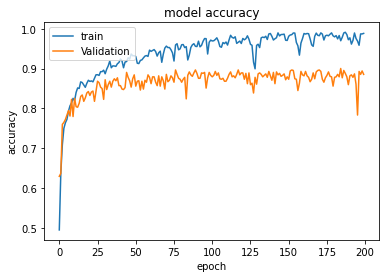

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()